In [15]:
import numpy as np
import pickle
import sys
import random

sys.path.append('../')
from riskrrt import RiskRRT
from utils import *

In [16]:
!ls ../results/dataset

bi_traj_B_crowds_zara030.pkl


In [17]:
with open('../results/dataset/bi_traj_B_crowds_zara030.pkl','rb') as f:
    data1 = pickle.load(f)

In [32]:
traj = [] # x, y, theta, vel
actions = [] # x, y, angular velocity

for n in data1:
    traj.append( [n.pose.x, n.pose.y, n.pose.theta, n.vel] )
    actions.append( [n.vel.linear.x_vel, n.vel.linear.y_vel, n.vel.angular] )
    

In [34]:
import matplotlib.pyplot as plt

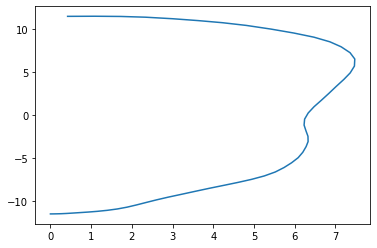

In [35]:
plt.plot([a[0] for a in traj], [a[1] for a in traj])

In [33]:
# do we consider actions?
actions

[[0.0, 0.0, 0.0],
 [0.06666666666666665, 0.0, 0.12],
 [0.1333333333333333, 0.0, 0.07999999999999999],
 [0.19999999999999996, 0.0, 0.03999999999999998],
 [0.2666666666666666, 0.0, 0.15999999999999998],
 [0.33333333333333326, 0.0, 0.27999999999999997],
 [0.3999999999999999, 0.0, 0.07999999999999996],
 [0.46666666666666656, 0.0, -0.04000000000000005],
 [0.5333333333333332, 0.0, 0.07999999999999996],
 [0.5999999999999999, 0.0, 0.19999999999999996],
 [0.6666666666666665, 0.0, 0.23999999999999994],
 [0.7333333333333332, 0.0, 0.35999999999999993],
 [0.7999999999999998, 0.0, 0.3999999999999999],
 [0.8666666666666665, 0.0, 0.1999999999999999],
 [0.9333333333333331, 0.0, -1.1102230246251565e-16],
 [0.9999999999999998, 0.0, -0.04000000000000012],
 [1.0666666666666664, 0.0, -0.16000000000000014],
 [1.133333333333333, 0.0, -0.04000000000000015],
 [1.1999999999999997, 0.0, 0.07999999999999985],
 [1.2666666666666664, 0.0, -0.12000000000000016],
 [1.333333333333333, 0.0, -1.6653345369377348e-16],
 [1.

In [23]:
traj

[[0.0, -11.5, 0.0, <utils.Twist at 0x106191af0>],
 [0.026656427846249955,
  -11.499360122870563,
  0.048,
 [0.07987830092278789,
  -11.495949264763238,
  0.07999999999999999,
 [0.15956789074100963,
  -11.488918422535217,
  0.09599999999999997,
 [0.2653438818767245, -11.475304665066236, 0.16, <utils.Twist at 0x13e279ee0>],
 [0.3955108308286218, -11.44674302569883, 0.272, <utils.Twist at 0x13e2830d0>],
 [0.548914503504889, -11.401299338011063, 0.304, <utils.Twist at 0x13e283dc0>],
 [0.7274613048268734, -11.34684990421853, 0.288, <utils.Twist at 0x13e28b0d0>],
 [0.9310039307529332,
  -11.28299360413797,
  0.3199999999999999,
 [1.1555592758305315,
  -11.198470331899301,
  0.3999999999999999,
 [1.395817720301835,
  -11.083004343779585,
  0.49599999999999994,
 [1.642877840576797,
  -10.925342809640615,
  0.6399999999999999,
 [1.8831991396510583,
  -10.71456471256636,
  0.7999999999999997,
 [2.114524554315327,
  -10.456490596922492,
  0.8799999999999996,
 [2.3523943148161304,
  -10.1687480821

In [30]:
data1[0].vel.linear.x_vel
data1[0].vel.linear.y_vel
data1[0].vel.angular


0.0